In this notebook, we will analyze chains from Planck and ACT collboration to derive cosmological constraints using GetDist|

In [1]:
import sys, os
from getdist import plots, MCSamples, loadMCSamples
import getdist as g
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

First we will download some chains from Planck and ACT archive

Load samples in GetDist. There are two types of samples here. Planck chains are cosmoMC samples. ACT ones however are cobaya samples.

In [2]:
# Loading cosmoMC samples
samp = loadMCSamples(file_root = '/Users/sg58477/work/UTAustin_CMBSummerSchool/UT_Notebooks/cosmo_chains/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing', settings={'ignore_rows': 0.2})
# root = The root name of the files to read (no extension)

Options for settings: https://getdist.readthedocs.io/en/latest/analysis_settings.html

There are mainly 4 kinds of plots you can make with getdist: plot(s)_1d, plot_2d, plot_3d, triangle_plot (you can also make plot_4d -- but it's rarely used)

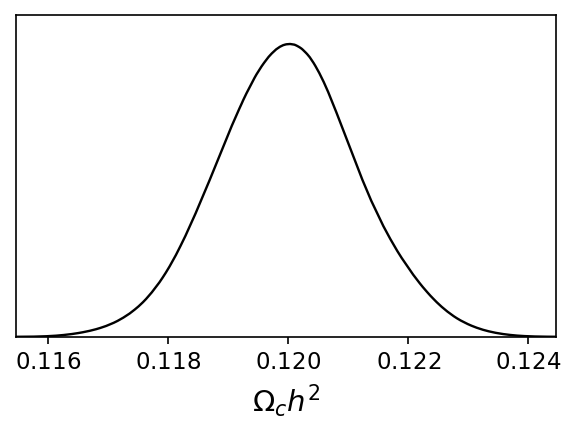

In [3]:
# 1D marginalized plot # https://getdist.readthedocs.io/en/latest/plots.html#getdist.plots.GetDistPlotter.plots_1d
g = plots.get_single_plotter(width_inch=4)
g.plot_1d(samp, 'omegach2')

(2, 1)

<Figure size 1200x900 with 0 Axes>

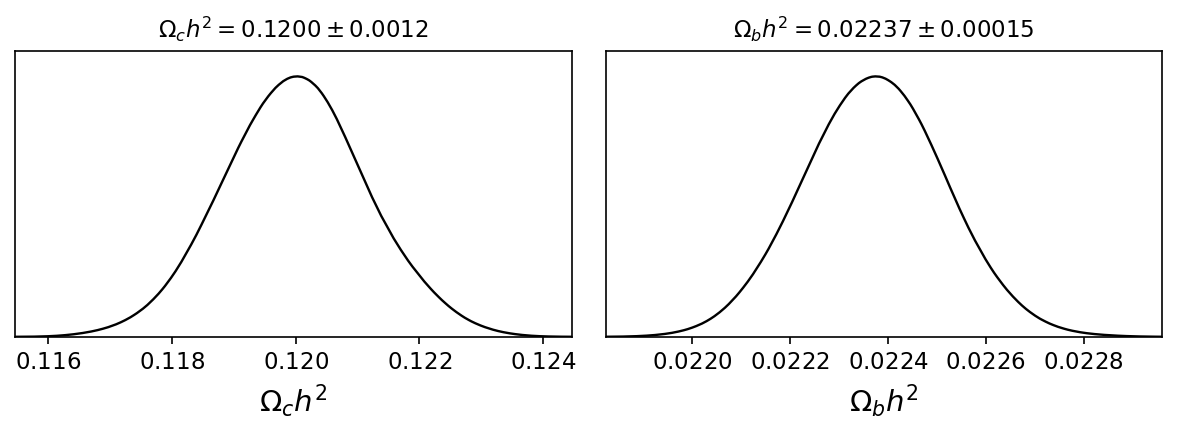

In [4]:
g = plots.get_single_plotter(width_inch=8);
g.plots_1d(samp, ['omegach2','omegabh2'], nx =2, title_limit =1)

In [5]:
# 2D marginalized plot 
# https://getdist.readthedocs.io/en/latest/plots.html#getdist.plots.GetDistPlotter.plot_2d

((0.9486890761677789, 0.9809781238322212),
 (2.990576115195215, 3.100943884804785))

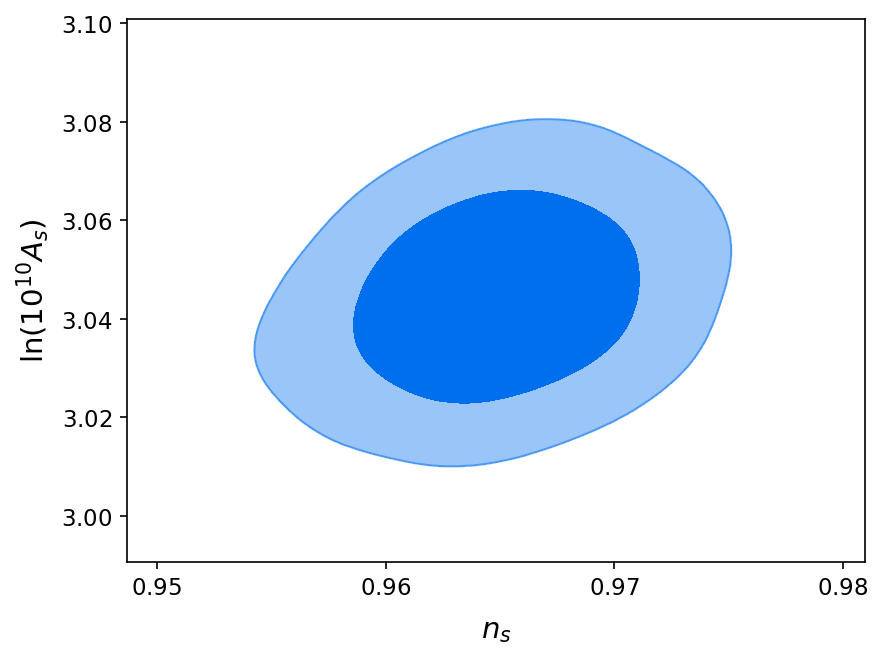

In [6]:
g = plots.get_single_plotter()
g.plot_2d(samp, 'ns', 'logA', filled = True)

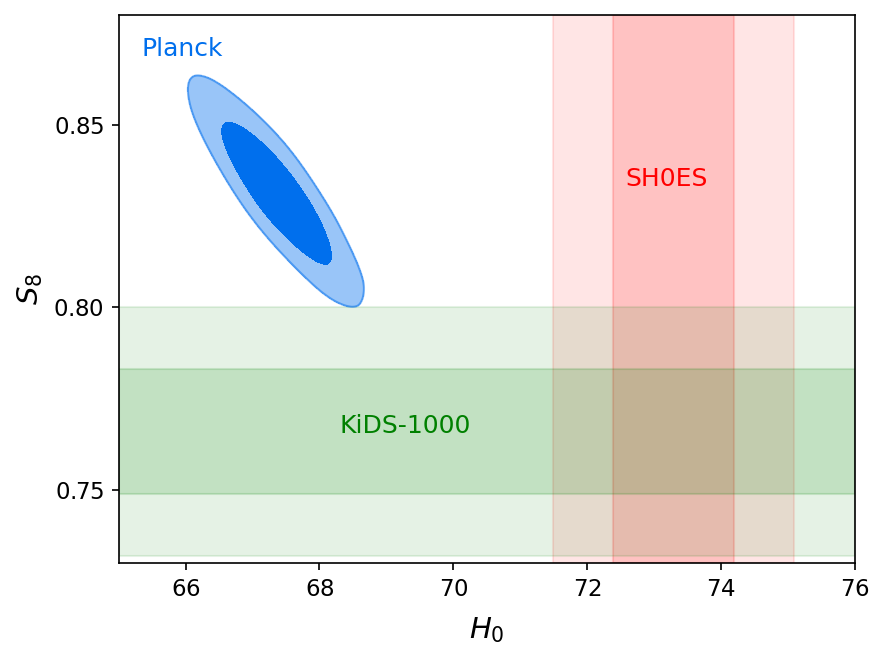

In [7]:
g = plots.get_single_plotter()
# samp.updateSettings({'contours': [0.68, 0.95, 0.99]})
# g.settings.num_plot_contours = 3
g.plot_2d(samp, 'H0', 'S8', filled = True, lims = [65,76,0.73,0.88])
g.add_x_bands(73.29, 0.9, color = 'r')
g.add_y_bands(0.766, 0.017, color = 'g')
g.add_text('SH0ES', x=0.8, y=0.7, color = 'r')
g.add_text('KiDS-1000', x=0.3, y=0.25, color = 'g')
g.add_legend(['Planck'], colored_text=True)

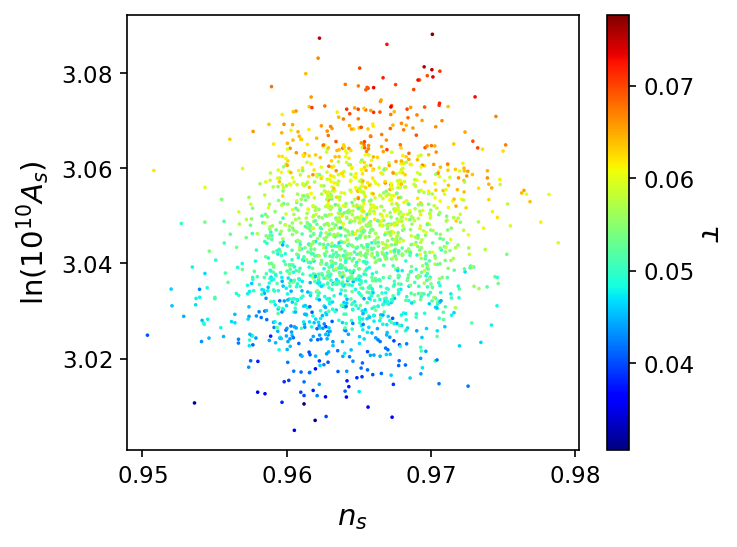

In [8]:
# 3D plot
# https://getdist.readthedocs.io/en/latest/plots.html#getdist.plots.GetDistPlotter.plot_3d
g = plots.get_single_plotter(width_inch=5)
g.plot_3d(samp, ['ns', 'logA', 'tau'])
# g.plot_2d(samp, ['ns', 'logA'])

<font color='red'>Exercise:</font> Explain the correlation between tau_reio and A_s or n_s. 

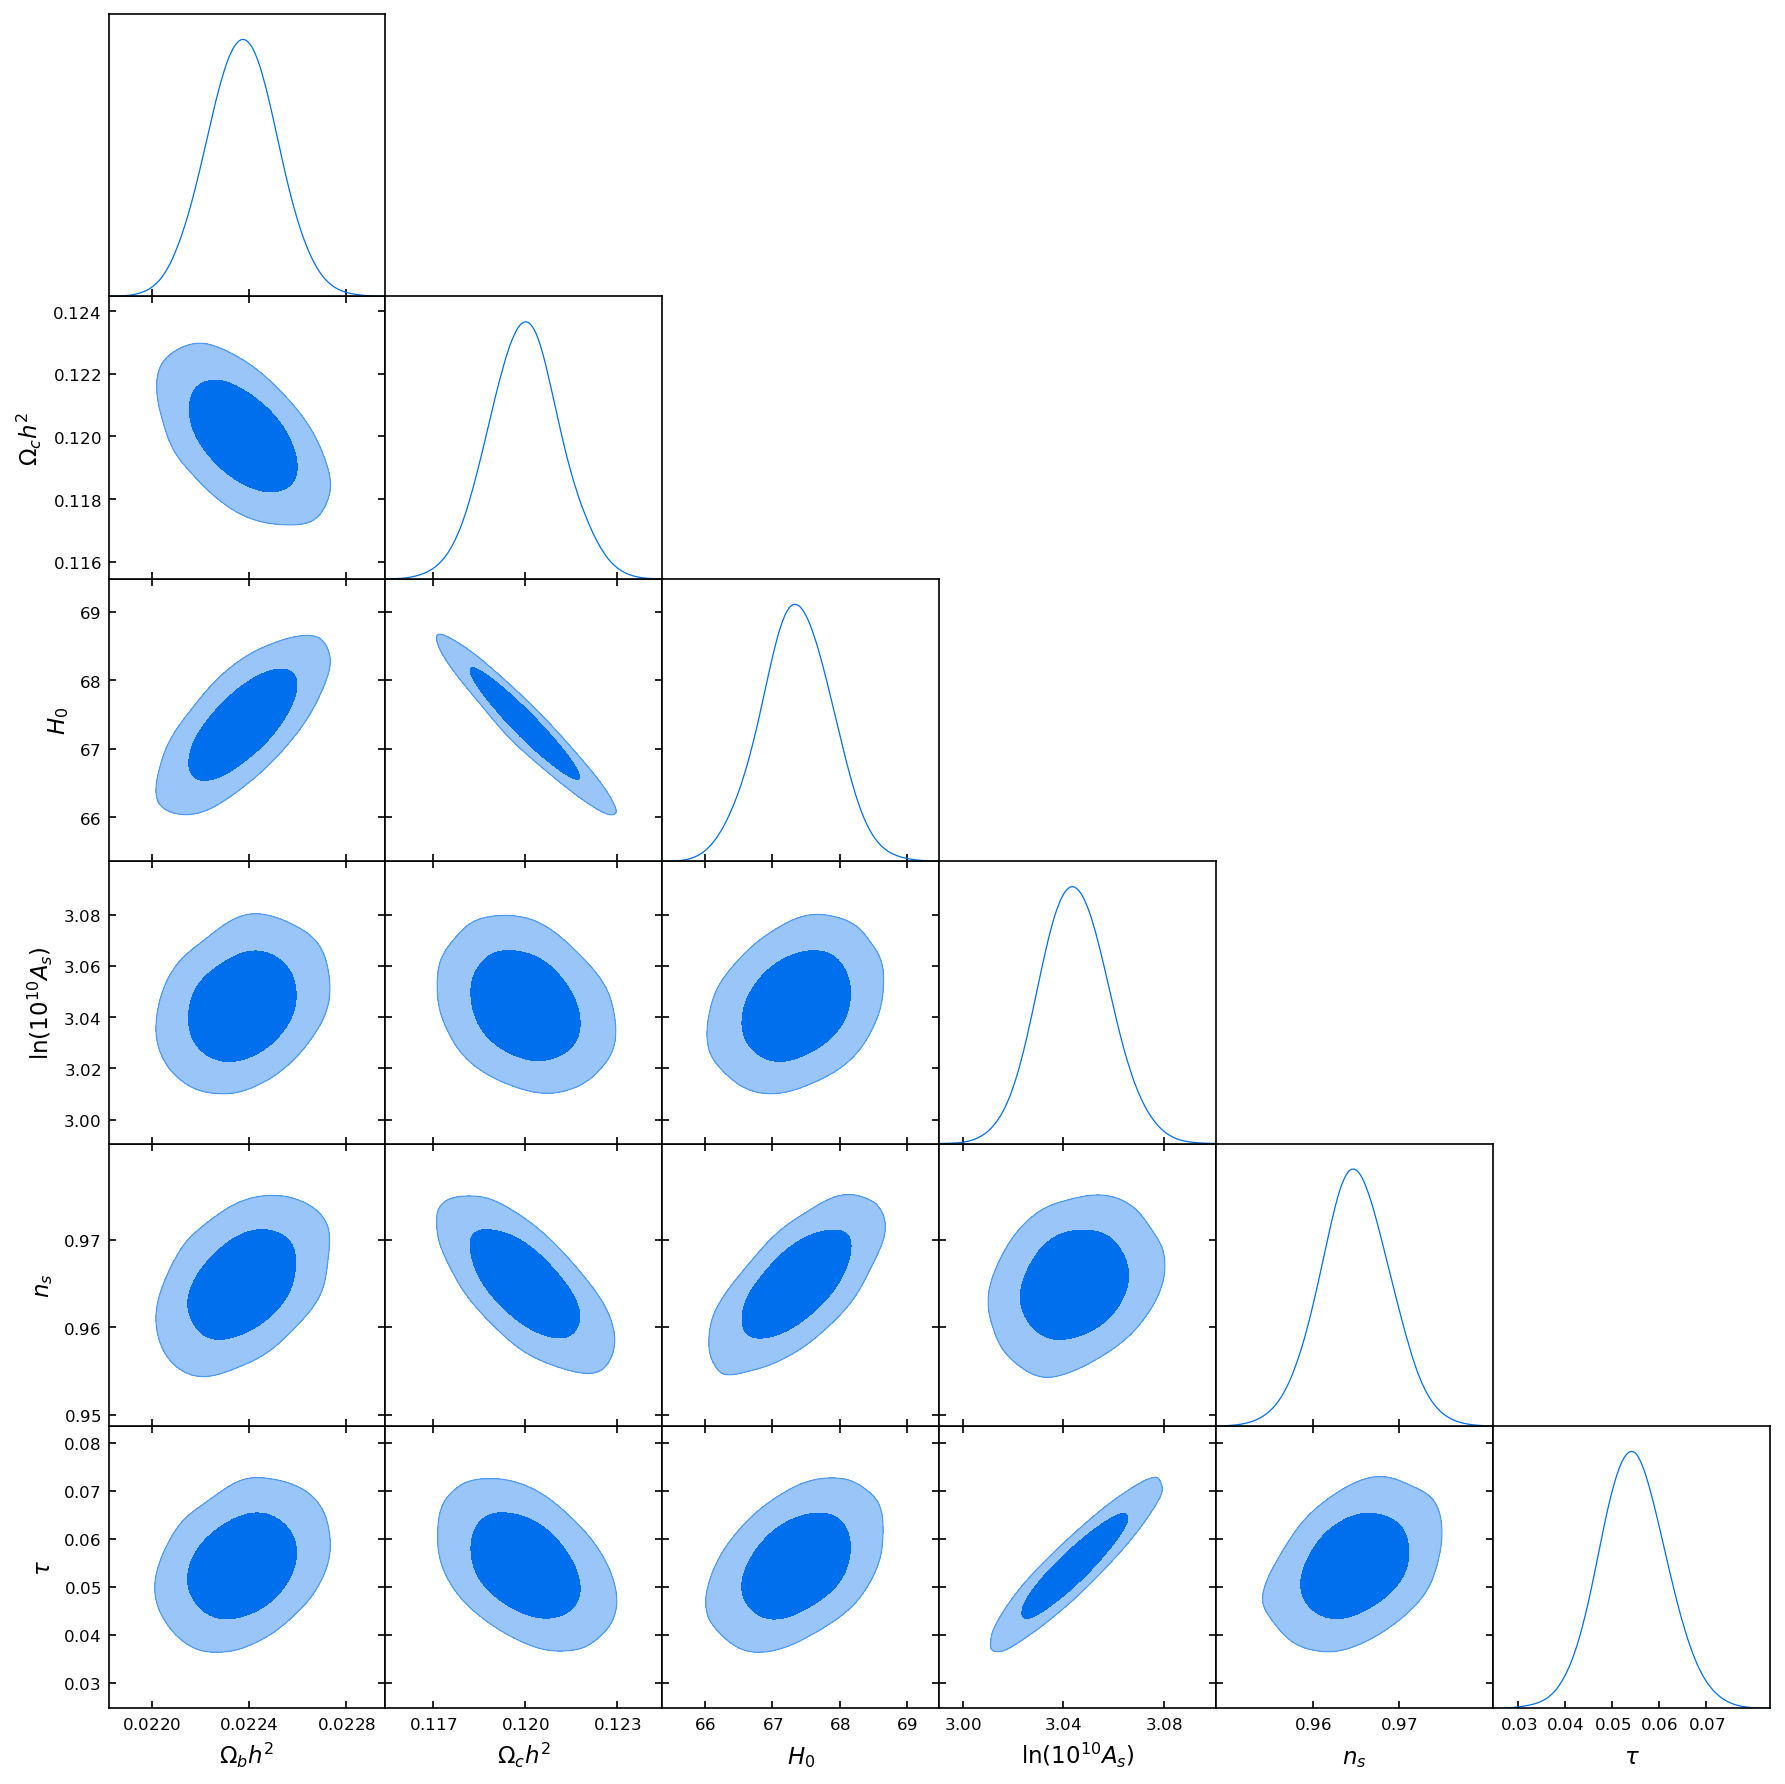

In [9]:
# Traingle plot 
# https://getdist.readthedocs.io/en/latest/plots.html#getdist.plots.GetDistPlotter.triangle_plot
g = plots.get_subplot_plotter()
g.triangle_plot(samp, params = ['omegabh2', 'omegach2', 'H0', 'logA', 'ns', 'tau' ],filled=True)


Now let's look into properties of the MC samples

In [14]:
# 68% C.L. limits for parameters
for par in ['omegabh2', 'omegach2', 'H0', 'logA', 'ns', 'tau' ]:
    print(samp.getInlineLatex(par, limit=1, err_sig_figs=None))

\Omega_b h^2 = 0.02237\pm 0.00015
\Omega_c h^2 = 0.1200\pm 0.0012
H_0 = 67.36\pm 0.54
{\rm{ln}}(10^{10} A_s) = 3.044\pm 0.014
n_s = 0.9649\pm 0.0042
\tau = 0.0544\pm 0.0073


In [17]:
# print(samp.getMargeStats())

In [18]:
print(samp.getLikeStats())

Best fit sample -log(Like) = 1391.020000
mean(-Ln(like)) = 1400.345813
-Ln(mean like)  = 1396.463386
2*Var(Ln(like)) = 24.900899

parameter      bestfit        lower1         upper1         lower2         upper2
omegabh2       2.2287960E-02  2.1864890E-02  2.2902970E-02  2.1864890E-02  2.2933140E-02   \Omega_b h^2
omegach2       1.2116800E-01  1.1613000E-01  1.2372620E-01  1.1602700E-01  1.2445420E-01   \Omega_c h^2
theta          1.0407000E+00  1.0398950E+00  1.0419460E+00  1.0398120E+00  1.0420080E+00   100\theta_{MC}
tau            4.7275060E-02  2.8015050E-02  8.6905750E-02  2.7426370E-02  8.6905750E-02   \tau
logA           3.0337060E+00  2.9979680E+00  3.1007780E+00  2.9864910E+00  3.1007780E+00   {\rm{ln}}(10^{10} A_s)
ns             9.6082340E-01  9.4956130E-01  9.7930790E-01  9.4918090E-01  9.7988560E-01   n_s
calPlanck      1.0006630E+00  9.9248090E-01  1.0096200E+00  9.9119630E-01  1.0099090E+00   y_{\rm cal}
acib217        4.6375690E+01  2.4713710E+01  6.9916000E+01  2.1071

In [ ]:
# Effects of smoothing of contours